In [71]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def primeiro_digito(numero):
    return int(str(numero)[0])

In [73]:
# Ler arquivo lei_benford_contas_partido_v2.csv
list_ = []
# Abrindo o arquivo CSV para leitura
with open('./base/lei_benford_contas_partido_v2.csv', 'r') as csvfile:
    # Criando um leitor CSV
    reader = csv.reader(csvfile)
    
    # Iterando sobre as linhas do arquivo
    for row in reader:
        list_.append(row[0])

In [74]:
df = pd.DataFrame(data=list_, columns=['coluna_com_numeros'])

# Extrair o primeiro dígito

In [75]:
df['primeiro_digito'] = df['coluna_com_numeros'].apply(primeiro_digito)

In [76]:
df.head()

,coluna_com_numeros,primeiro_digito
0,480,4
1,20000,2
2,2000,2
3,3900,3
4,2000000,2


# Calcular a frequência dos primeiros dígitos

In [77]:
frequencias = df['primeiro_digito'].value_counts(normalize=True)

# Comparar com a distribuição esperada pela Lei de Benford

In [78]:
# Distribuição esperada pela Lei de Benford
def distribuicao_benford(n):
    return np.log10(1 + (1/n))

digitos = np.arange(1, 10)
esperado = distribuicao_benford(digitos)

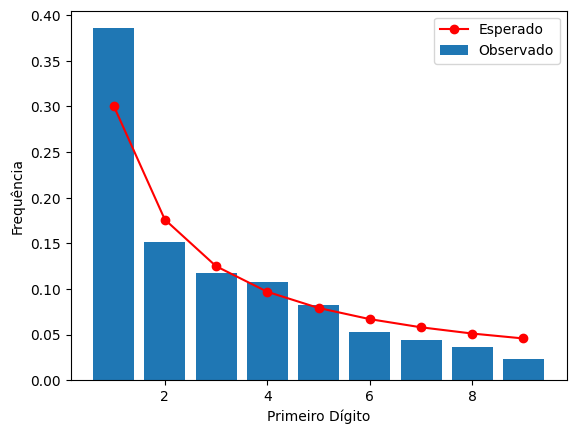

In [79]:

# Plotar um gráfico para comparação visual
plt.bar(digitos, frequencias, label='Observado')
plt.plot(digitos, esperado, 'ro-', label='Esperado')
plt.xlabel('Primeiro Dígito')
plt.ylabel('Frequência')
plt.legend()
plt.show()